In [37]:
import numpy as np
from scipy.spatial.distance import cdist
%matplotlib inline 

class KMeans:import numpy as np
from scipy.spatial.distance import cdist

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=0.0001):
        self.n_clusters = n_clusters
        self.centroids = None
        self.max_iter = max_iter
        self.tol = tol

    def predict(self, X):
        # Find the distance between each data points with the k centroids.
        distances = cdist(X, self.centroids, metric='euclidean')
        # assign each data point to the closest centroid based on distance
        clusters = np.array([np.argmin(d) for d in distances])
        return clusters

    def fit(self, X):
        # Randomly pick k data points as our initial Centroids.
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx, :]

        clusters = self.predict(X)

        i = 0
        tol = float('inf')
        while i < self.max_iter and tol > self.tol:
            # Update centroid location by taking the average of the points in each cluster group
            centroids = []
            for k in range(self.n_clusters):
                updated_cluster = X[clusters == k].mean(axis=0)
                centroids.append(updated_cluster)
            centroids = np.vstack(centroids)
            tol = np.linalg.norm(centroids - self.centroids)
            self.centroids = centroids

            clusters = self.predict(X)
            i += 1
# reference https://www.askpython.com/python/examples/k-means-clustering-from-scratch

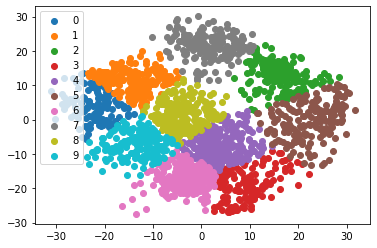

In [36]:
# Load Data
data = load_digits().data
pca = PCA(2)

# Transform the data
df = pca.fit_transform(data)

kmeans = KMeans(10)
kmeans.fit(df)
# Applying our function
label = kmeans.predict(df)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)
plt.legend()
plt.show()


In [ ]:
class Regression:
    def __init__(self, learning_rate=0.01, max_it=1000):
        self.learning_rate = learning_rate
        self.max_it = max_it
        self.W = None

    def cost_fn(self, X, y):
        prediction = self.predict(X)
        error = prediction - y
        m = y.size
        cost = 1 / (2 * m) * np.dot(error.T, error)
        return cost

    def gradient(self, X, y):
        prediction = self.predict(X)
        error = prediction - y
        m = y.size
        grad = (1 / m) * np.dot(X.T, error)
        return grad

    def predict(self, X):
        return np.dot(X, self.W)

    def fit(self, X, y):
        costs = []
        self.W = np.random.rand(X.shape[1])
        i = 0
        while i < self.max_it:
            costs.append(self.cost_fn(X, y))
            grads = self.gradient(X, y)
            self.W = self.W - self.learning_rate * grads
            i += 1


class LogisticRegression(Regression):

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_fn(self, X, y):
        a = self.sigmoid(self.predict(X))
        J = np.sum(-y * np.log(a) - (1 - y) * np.log(1 - a))
        return J

    def gradient(self, X, y):
        a = self.sigmoid(self.predict(X))
        return np.dot(X.T, (a - y))
